### 1. Îì§Ïñ¥Í∞ÄÎ©∞
- augmentation + ÌÖêÏÑúÌîåÎ°úÏö∞ Î™®Îç∏ ÌïôÏäµÏóê Ïñ¥ÎñªÍ≤å Ï†ÅÏö©Ìï† Ïàò ÏûàÎäîÏßÄ  
  AugmentationÎèÑ ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏùò Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÍ≤ΩÌï¥ Ï£ºÎäî Í≥ºÏ†ïÏù¥Îùº  
  Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ïÍ≥º ÌôúÏö©Î∞©Î≤ï ÎèôÏùº  


##### 1) ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [2]:
#ÌïôÏäµ Ï†Ñ, GPU ÌôòÍ≤Ω ÌôïÏù∏ (ÌïÑÏàò)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

##### 2) Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂àÎü¨Ïò§Í∏∞  
- [stanford_dogs Îç∞Ïù¥ÌÑ∞ÏÖã](https://www.tensorflow.org/datasets/catalog/stanford_dogs)  
  120Í∞ú Í≤¨Ï¢ÖÏùò Ïù¥ÎØ∏ÏßÄ Ìè¨Ìï®  
  Ï¥ù 20,580Ïû• (12,000Ïû• ÌïôÏäµÏÖã, 8,580Ïû•ÏùÄ ÌèâÍ∞ÄÏö© ÏÖã)  
  
  
- ÌîÑÎ°úÏ†ùÌä∏ ÎîîÎ†âÌÜ†Î¶¨ÎßêÍ≥†,TensorFlow Datasets Í∏∞Î≥∏ ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•ÌïòÍ∏∞  
  (Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Îã§Î•∏ ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎèÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏúºÎãà)

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling stanford_dogs-train.tfrecord...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling stanford_dogs-test.tfrecord...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /aiffel/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [4]:
# Tensorflow Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌïòÎ©¥ Íº≠ feature Ï†ïÎ≥¥ ÌôïÏù∏ ÌïÑÏàò 
print(ds_info.features)

#Ï±ÑÎÑê Ïàò : 3

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
    'objects': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
    }),
})


In [5]:
# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(12000, shape=(), dtype=int64)
tf.Tensor(8580, shape=(), dtype=int64)


In [6]:
#ÌÅ¥ÎûòÏä§ Í∞úÏàò
ds_info.features["label"].num_classes

120

In [7]:
#ÌÅ¥ÎûòÏä§ Î™Ö
ds_info.features["label"].names

['n02085620-chihuahua',
 'n02085782-japanese_spaniel',
 'n02085936-maltese_dog',
 'n02086079-pekinese',
 'n02086240-shih-tzu',
 'n02086646-blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-rhodesian_ridgeback',
 'n02088094-afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-walker_hound',
 'n02089973-english_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-irish_wolfhound',
 'n02091032-italian_greyhound',
 'n02091134-whippet',
 'n02091244-ibizan_hound',
 'n02091467-norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-saluki',
 'n02092002-scottish_deerhound',
 'n02092339-weimaraner',
 'n02093256-staffordshire_bullterrier',
 'n02093428-american_staffordshire_terrier',
 'n02093647-bedlington_terrier',
 'n02093754-border_terrier',
 'n02093859-kerry_blue_terrier',
 'n02093991-irish_terrier',
 'n02094114-norfolk_terrier',
 'n02094258-norwi

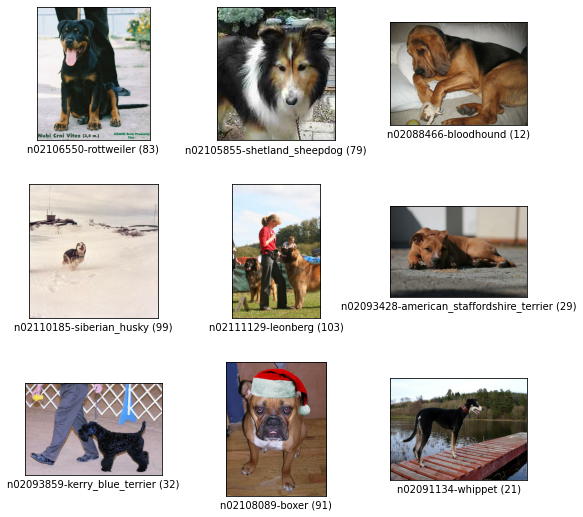

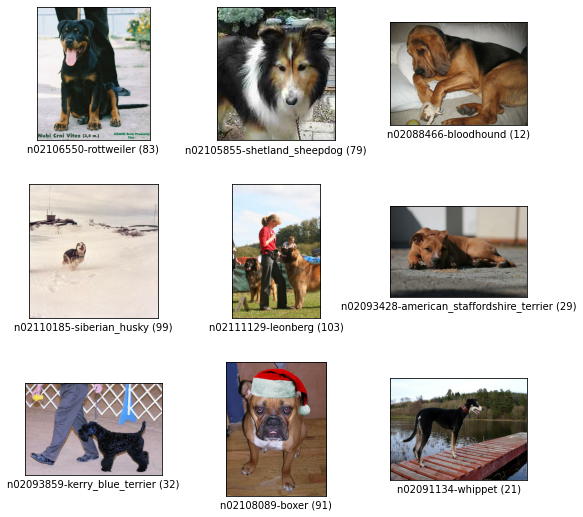

In [8]:
#Îã§Ïö¥Î°úÎìú Î∞õÏùÄ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
tfds.show_examples(ds_train, ds_info)

-----
### 2. Augmentation Ï†ÅÏö©ÌïòÍ∏∞  

#### 1. ÌÖêÏÑúÌîåÎ°úÏö∞ Random Augmentation API ÏÇ¨Ïö©ÌïòÍ∏∞  
- ÌÖêÏÑúÌîåÎ°úÏö∞ APIÎ°ú Î∞îÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Î∞©Î≤ïÎì§ÏùÑ Î®ºÏ†Ä Ï†ÅÏö©Ìï¥Î≥¥Í∏∞Î°ú Ìï®  
- Ïù¥ÎØ∏ÏßÄÏÖãÏóê ÎåÄÌï¥ÏÑú ÎûúÎç§Ìïú ÌôïÎ•†Î°ú Î∞îÎ°ú Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî augmentation Ìï®Ïàò  
  1) random_brightness()  
  2) random_contrast()  
  3) random_crop()  
  4) random_flip_left_right()  
  5) random_flip_up_down()  
  6) random_hue()  
  7) random_jpeg_quality()  
  8) random_saturation()  
 
##### 1) Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò ÏÉùÏÑ±  
- Augmentation Ï†ÅÏö© Ï†Ñ  
- Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôòÏùò Í≤∞Í≥ºÎ°ú Î¶¨ÌÑ¥ Î∞õÏùÄ Ïù¥ÎØ∏ÏßÄ Í∑∏ Îã§Ïùå Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò ÏûÖÎ†•ÏúºÎ°ú  
  Í≥ÑÏÜç Ïû¨ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Íµ¨Ï°∞Í∞Ä Îê® -> Ìé∏Î¶¨  
  
  
```
def Ï†ÑÏ≤òÎ¶¨_Ìï®Ïàò(image, label):   # Î≥ÄÌôòÌï† Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®
    # Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôò Î°úÏßÅ Ï†ÅÏö©
    new_image = Ïù¥ÎØ∏ÏßÄ_Î≥ÄÌôò(image)
    return new_image, label  
```
- ÏûÖÎ†•Î∞õÏùÄ Ïù¥ÎØ∏ÏßÄÎ•º 0~1 ÏÇ¨Ïù¥Ïùò float32Î°ú normalize  
- (224, 224) ÏÇ¨Ïù¥Ï¶àÎ°ú resize  

In [9]:
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

##### 2) random augmentation Ï§ë Î™áÎ™á Í∏∞Îä• Ï†ÅÏö©  
- andom_flip_left_right() :  
  Ï¢åÏö∞ ÎåÄÏπ≠ Ìï¥Ï§å  
  -> Í∞ú Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ï¢åÏö∞ ÎåÄÏπ≠ Ìï¥ÎèÑ Í¥úÏ∞ÆÏùå  
  (Í∑ºÎç∞ ÎßåÏïΩ Í∏ÄÏûêÏòÄÎã§Î©¥? Ï£ºÏùòÌï¥ÏïºÌï† ÎìØ)  
  -> ÏÉÅÌïòÎåÄÏπ≠ÏùÄ ÏïàÌï†Í≤å  
  (Îç∞Ïù¥ÌÑ∞ ÏÖã ÏÉùÍ∞Å Ìï¥Î≥º Îïå, ÏúÑÏïÑÎûò Îí§ÏßëÌûå ÏÇ¨ÏßÑ ÏóÜÏñ¥ÏÑú ÎèÑÏõÄ ÏïàÎê†ÎìØ)  
  
  
- random_brightness() :  
  Î∞ùÍ∏∞ Ï°∞Ï†àÌï¥ÏÑú Îã§ÏñëÌïú ÌôòÍ≤ΩÏóêÏÑú ÏñªÏñ¥ÏßÑ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÏùëÌï† Ïàò ÏûàÎèÑÎ°ù ÏùòÎèÑ  
  

In [10]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

##### 3) Augmentation Ï†ÅÏö© Ìï®Ïàò ÏÉùÏÑ±  
- apply_normalize_on_dataset() :  
  ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Îã§ÏñëÌïú ÌòïÌÉúÏùò Í∞ÄÍ≥µÌïú ÌòïÌÉúÏùò  
  ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏñªÍ≤å ÎêòÎäî Î™®Îì† Í≥ºÏ†ïÏùÑ Íµ¨ÌòÑÌïú Î©îÏù∏ Ìï®Ïàò  
  
  -> ÏùºÎ∞òÏ†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï  
  (normalize, resize, augmentation, shuffle Ï†ÅÏö©)  
  
  -> Ï£ºÏùòÌï¥Ïïº Ìï† Ï†ê  
  shuffleÏù¥ÎÇò augmentationÏùÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Ï†ÅÏö© ÏïàÌï®  
  
  
- Ïó¨Îü¨Í≤∞Í≥º Ï°∞Ìï© ÏúÑÌïú ÏïôÏÉÅÎ∏î(ensemble) Î∞©Î≤ï Ï§ë ÌïòÎÇò  
  -> ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê augmentation Ï†ÅÏö©ÌïòÎäî test-time augmentation  
  (Ï∫êÍ∏Ä Îì± Í≤ΩÏüÅ Î®∏Ïã†Îü¨ÎãùÏóê ÎßéÏù¥ ÏÇ¨Ïö©, ÏßÄÍ∏àÏùÄ Í∞úÎÖêÎßå ÏïåÏïÑÎëêÏûê)  
  ([ test-time augmentation ÏÑ§Î™Ö Î∏îÎ°úÍ∑∏](https://hwiyong.tistory.com/215))  
  
  
- with_aug=False :  
  augmentationÏùò Ï†ÅÏö©Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌï† Ïàò ÏûàÎèÑÎ°ù Ìï®  
  (Ïù¥ÌõÑ ÎπÑÍµê Ïã§Ìóò ÏúÑÌï¥)  
  [tf.data.Datasets.map()](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)  

In [11]:
# Îç∞Ïù¥ÌÑ∞ÏÖã(ds)ÏùÑ Í∞ÄÍ≥µÌïòÎäî Î©îÏù∏Ìï®Ïàò
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ÅÏö©
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment,       # augment Ìï®Ïàò Ï†ÅÏö©
            num_parallel_calls=2 #Î≥ëÎ†¨ Ï≤òÎ¶¨ ÏàòÏ§Ä ÏßÄÏ†ï
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

#### 2. Random Augmentation ÏßÅÏ†ë Íµ¨ÌòÑÌïòÍ∏∞  
- ÏúÑÏóêÏÑú ÎßåÎì† augment() :  
  ÎØ∏Î¶¨ Íµ¨ÌòÑÎêú random augmentationÏùÑ Ï†ÅÏö©ÌïòÎäî Ìï®Ïàò  
  
- augment2() :  
  tf.imageÏùò Îã§ÏñëÌïú Ìï®ÏàòÎì§Î°ú ÏßÅÏ†ë Îã§ÏñëÌïú augmentation Í∏∞Î≤ïÏùÑ ÎûúÎç§ÌïòÍ≤å  
  Ï†ÅÏö©Ìï¥Î≥¥Îäî Ìï®Ïàò ÏÉùÏÑ±Ìï¥Î≥¥Í∏∞  

In [12]:
def augment2(image,label):
    image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))
    image = tf.image.resize(image, [224, 224])
    return image, label

-----
### 3. ÎπÑÍµêÏã§Ìóò ÌïòÍ∏∞  
- ÎπÑÍµêÌï† Í≤É  
  augmentation Ï†ÅÏö© vs Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞  
  ÌïôÏäµÏãúÌÇ® Î™®Îç∏Ïùò ÏÑ±Îä•  
  -> ÏÉàÎ°úÏö¥ augmentation ÌïòÍ≥† Ïã∂ÏúºÎ©¥ Í∑∏Í≤ÉÎèÑ ÎπÑÍµê Í∞ÄÎä•  
  
##### 1) Í∏∞Î≥∏:  ResNet50 Ï§ë imagenet ÏúºÎ°ú ÌõàÎ†®Îêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [13]:
#num_classes = Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÎùºÎ≤® Í∞úÏàò Î∞õÏïÑÏò¥
num_classes = ds_info.features["label"].num_classes

#ÌÖêÏÑúÌîåÎ°úÏö∞ ÏºÄÎùºÏä§Ïùò ResNet50 Ï§ë imagenetÏúºÎ°ú ÌõàÎ†®Îêú Î™®Îç∏ Î∂àÎü¨Ïò¥
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False, # include_top: ÎßàÏßÄÎßâ fully connected layer Ìè¨Ìï®/ÎØ∏Ìè¨Ìï®
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])


94773248/94765736 [==============================] - 2s 0us/step


- include_top ÏúºÎ°ú ÎßàÏßÄÎßâ fully connected layer ÎØ∏Ìè¨Ìï®ÏãúÌÇ§Î©¥  
  -> ÌäπÏÑ± Ï∂îÏ∂úÍ∏∞(feature extractor) Î∂ÄÎ∂ÑÎßå Î∂àÎü¨Ïò¥  
  -> Ïö∞Î¶¨Ïùò ÌïÑÏöîÏóê ÎßûÍ≤å ÏàòÏ†ïÎêú fully connected layerÎ•º Î∂ôÏó¨ÏÑú ÌôúÏö© Í∞ÄÎä•  
  -> Ïôú Ïù¥Î†áÍ≤å Ìï†Íπå?  
  -> Ïù¥ÎØ∏ÏßÄÎÑ∑(ImageNet)Í≥º Ïö∞Î¶¨Ïùò ÌÖåÏä§Ìä∏ÏÖã ÏÑúÎ°ú Îã§Î•∏ ÌÅ¥ÎûòÏä§ Í∞ÄÏßÄÍ∏∞ ÎïåÎ¨∏  
  -> Í∑∏ÎûòÏÑú ÎßàÏßÄÎßâÏóê Ï∂îÍ∞ÄÌï¥Ïïº ÌïòÎäî fully connected layerÏùò Íµ¨Ï°∞(Îâ¥Îü∞Ïùò Í∞úÏàò)ÎòêÌïú Îã§Î•¥Í∏∞ ÎïåÎ¨∏  

##### 2) Augmentation Ï†ÅÏö©:  ResNet ÌïòÎÇò Îçî ÏÉùÏÑ±  
-  ÏßàÎ¨∏ : Ïôú Íµ≥Ïù¥ Î™®Îç∏ÏùÑ ÌïòÎÇò Îçî ÎßåÎì§ÏßÄ?  
   Í∑∏ÎÉ• Í∞ôÏùÄ Î™®Îç∏Ïù¥Î©¥ Îç∞Ïù¥ÌÑ∞ÏÖãÎßå aug Ï†ÅÏö©Ìï¥ÏÑú ÌïôÏäµÌïòÎ©¥ ÎêòÏßÄ ÏïäÎÇò?  
   -> Îã§Î•∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö© Îì± Îã§Î•∏ Ïã§Ìóò ÏÉÅÌô©Îì§Ïóê Ïì∞Í∏∞ ÏúÑÌï¥  

In [14]:
aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

##### 3) Augmentation Ï†ÅÏö© vs ÎØ∏Ï†ÅÏö©  Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
Î≥ºÎü¨Ïò® Îç∞Ïù¥ÌÑ∞Ïóê  
apply_normalize_on_dataset() ÎÇ¥Ïóê  
1) with_aug= False  
   -> augmentationÏù¥ Ï†ÅÏö©ÎêòÏßÄ ÏïäÎèÑÎ°ù  

2) with_aug= True  
   -> augmentation Ï†ÅÏö©

3) Í∑∏Î¶¨Í≥† aug Ï†ÅÏö© ÏïàÌïú test Îç∞Ïù¥ÌÑ∞ ÏÖãÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±  

In [15]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)

##### 4) ÌïôÏäµ  
- ÏïÑÎûòÏóêÏÑú ÌïúÍ∫ºÎ≤àÏóê ÏßÑÌñâ  
- EPOCH=20ÏúºÎ°ú ÏßÑÌñâÏãú GPU Í∏∞Î∞òÏúºÎ°ú 3~4ÏãúÍ∞Ñ Í∞ÄÎüâÏùò ÏãúÍ∞ÑÏù¥ ÏÜåÏöî  
- ÏòàÏãúÎ°ú 3Îßå ÎèåÎ†§Î¥Ñ  
  Ïã§Ï†úÏóêÏÑúÎäî Ï∂©Î∂ÑÌïú ÌïôÏäµÏù¥ Íº≠ ÏßÑÌñâÎêòÏñ¥ÏïºÌï®  

##### 5) ÌõàÎ†®Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
- ÏïÑÎûòÏóêÏÑú ÌïúÍ∫ºÎ≤àÏóê ÏßÑÌñâ  

In [ ]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.show()

- Ï¢Ä Îçî ÌôïÎåÄÌï¥ÏÑú ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í∏∞

In [ ]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.grid(True)
plt.ylim(0.50, 0.80)    # Ï∂úÎ†•ÌïòÍ≥†Ïûê ÌïòÎäî  Accuracy Î≤îÏúÑÎ•º ÏßÄÏ†ïÌï¥ Ï£ºÏÑ∏Ïöî. 
#plt.ylim(0.72, 0.76)  # EPOCH=20ÏúºÎ°ú ÏßÑÌñâÌïúÎã§Î©¥ Ïù¥ Î≤îÏúÑÍ∞Ä Ï†ÅÎãπÌï©ÎãàÎã§. 
plt.show()

- EPOCH=20ÏúºÎ°ú ÏàòÌñâÌï¥ Î≥∏ Îëê Î™®Îç∏Ïùò ÌõàÎ†® Í≥ºÏ†ï ÏãúÍ∞ÅÌôî Í≤∞Í≥º (ÎØ∏Î¶¨Î≥¥Í∏∞)    
  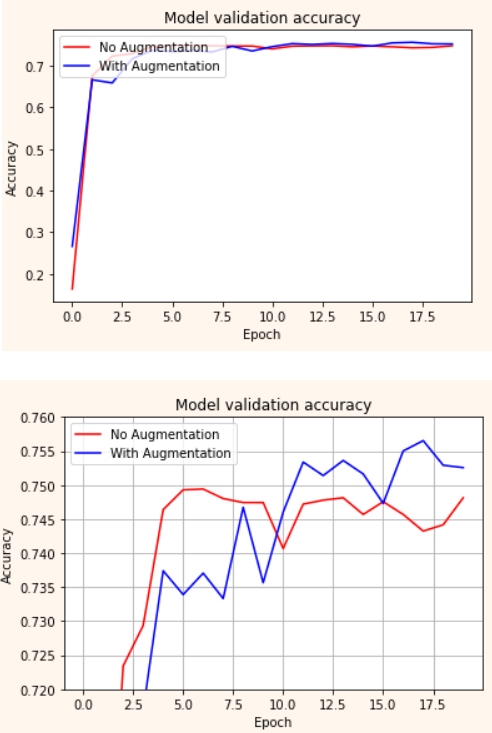  
   -> Augmentation Ï†ÅÏö©Ìïú ÌïôÏäµÏù¥ Îçî Ï≤úÏ≤úÌûà ÌïôÏäµÎêòÏßÄÎßå  
   EPOCH 10ÏùÑ Ï†ÑÌõÑÌï¥ÏÑú aug_resnet50Ïùò accuracyÍ∞Ä Îçî ÎÜíÍ≤å ÌòïÏÑ±

-----
### 5. Cutmix Augmentation  

#### 1. Í∞úÎÖê  
##### 1) ÏÜåÍ∞ú  
ÎÑ§Ïù¥Î≤Ñ ÌÅ¥Î°úÎ∞î(CLOVA)ÏóêÏÑú Î∞úÌëúÌïú  
[CutMix: Regularization Strategy to Train Strong Classifiers with Localizable Features](https://arxiv.org/pdf/1905.04899.pdf) ÏóêÏÑú Ï†úÏïàÎêú Î∞©Î≤ï  
-> Ïù¥ÎØ∏ÏßÄÎ•º ÏûêÎ•¥Í≥† ÏÑûÎäî Í≤É  
  
  
##### 2) ResNet-50 vs Mixup vs Cutout
  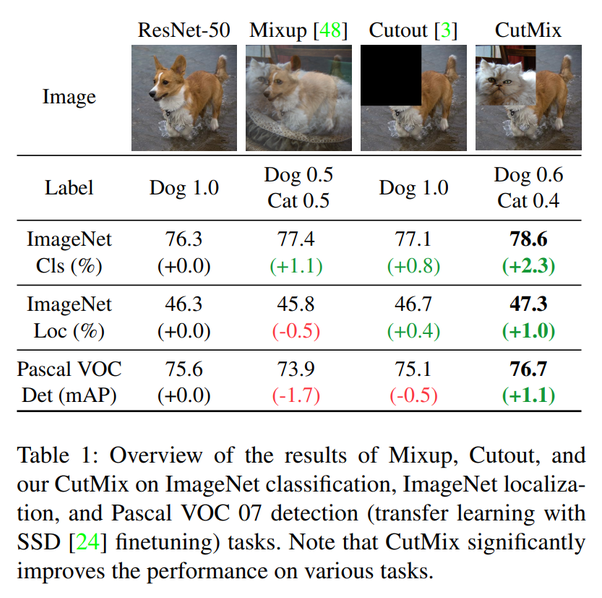  
  1) ResNet-50 : ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï¥ÏôîÎçò Î∞©Ïãù  
  2) Mixup : ÌäπÏ†ï ÎπÑÏú®Î°ú ÌîΩÏÖÄÎ≥Ñ Í∞íÏùÑ ÏÑûÎäî Î∞©Ïãù  
  3) Cutout : Ïù¥ÎØ∏ÏßÄÎ•º ÏûòÎùºÎÇ¥Îäî Î∞©Ïãù  
  (CutMixÎäî MixupÍ≥º ÎπÑÏä∑ÌïòÏßÄÎßå ÏùºÏ†ï ÏòÅÏó≠ÏùÑ ÏûòÎùºÏÑú Î∂ôÏó¨Ï£ºÎäî Î∞©Î≤ï)  
  

##### 3)  Ï∫êÍ∏Ä Ï∞∏Í≥†  
[Chris Deotte's CutMix and MixUp on GPU/TPU](https://www.kaggle.com/cdeotte/cutmix-and-mixup-on-gpu-tpu)  
-> Ï∫êÍ∏Ä Í∑∏ÎûúÎìúÎßàÏä§ÌÑ∞Ïù∏ Chris DeotteÍ∞Ä Íµ¨ÌòÑÌïú CutMixÏôÄ MixUp ÌôïÏù∏ Í∞ÄÎä•
-> Íµ¨ÌòÑ Ïãú Ï∞∏Í≥†Ìï¥Î≥¥Í∏∞  
(Ï∫êÍ∏ÄÏóêÏÑú ÎπÑÏä∑Ìïú ÌÉúÏä§ÌÅ¨ ÎåÄÌöå ÏûàÎäî Í≤ΩÏö∞,  
Îã§Î•∏ ÏÇ¨ÎûåÏù¥ Ï†ÅÏö©Ìïú Î∞©Î≤ï Î≥¥Îäî Í≤ÉÎèÑ Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏñªÍ∏∞Ïóê Ï¢ãÏùå)  

#### 2. Ïù¥ÎØ∏ÏßÄ ÏÑûÍ∏∞  
- Îëê Ïù¥ÎØ∏ÏßÄ ÏÑûÎäî Í≤É Î∂ÄÌÑ∞ ÏÉùÍ∞ÅÌï¥Î≥¥Ïûê  
  -> Î∞∞Ïπò ÎÇ¥ Ïù¥ÎØ∏ÏßÄ 2Í∞ú Í≥®ÎùºÏÑú ÏÑûÏùå  
  -> Ïù¥Îïå Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏûòÎùºÏÑú ÏÑûÏñ¥ Ï£ºÎäî ÏòÅÏó≠ = Î∞îÏö¥Îî© Î∞ïÏä§(bounding box)  

##### 1) Îç∞Ïù¥ÌÑ∞ ÏÖãÏóêÏÑú ÏûÑÏùòÏùò Ïù¥ÎØ∏ÏßÄ 2Í∞ú Í∞ÄÏ†∏Ïò§Í∏∞

ÎûúÎç§Ìïú Î∞îÏö¥Îî© Î∞ïÏä§ ÏúÑÏπò Ï∂îÏ∂ú + Îëê Ïù¥ÎØ∏ÏßÄ ÏÑûÎäî Ìï®Ïàò ÏÉùÏÑ±  
- Ïù¥ÎØ∏ÏßÄÎ•º ÌÖêÏÑúÎ°ú ÎßåÎì§Ïñ¥ ÌÖêÏÑúÌîåÎ°úÏö∞ Ïó∞ÏÇ∞  
  <- ÏòàÏãúÎ°ú Ïù¥ÎØ∏ÏßÄ 2Í∞ú Í∞ÄÏ†∏ÏôÄÏÑú Ïã§Ìñâ  
  <- Ïù¥ÎØ∏ÏßÄÎäî tfdsÏóêÏÑú Ìïú Ïû• ÎΩëÏïÑÏÑú ÏÇ¨Ïö©  

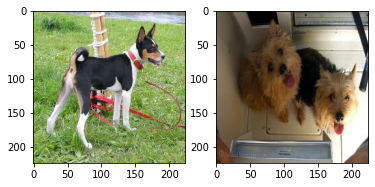

In [16]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïù¥ÎØ∏ÏßÄ 2Í∞úÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 
# result = object.take(indices, axis=1) 
# object = Î©îÏÑúÎìúÍ∞Ä Ï†ÅÏö©ÎêòÎäî Í∞ùÏ≤¥ = DataFrame, Series
# indices : Ïù∏Îç±Ïä§
# axis = 0 : Ìñâ Ïù∏Îç±Ïä§ Ï†ïÎ†¨, axis = 1 : Ïó¥ Ïù∏Îç±Ïä§ Ï†ïÎ†¨

#enumerate() : (Ïù∏Îç±Ïä§,ÏõêÏÜå) ÌäúÌîåÎ°ú Í∞ÄÏ†∏Ïò§ÎäîÎç∞, Ïó¨Í∏∞ÏÑ† (Ïù∏Îç±Ïä§,(image, label))
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    #16 Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎ•º ÌñàÏúºÎãàÍπå -> 750Í∞úÍ∞Ä 16Í∞úÎ°ú ÎÇòÎâòÏñ¥ÏÑú 10Í∞úÏùò Í∑∏Î£πÏù¥ ÏûàÎäîÍ±∞
    # Ìñâ : 750Í∞ú, Ïó¥ : 16Í∞ú
    # 0 Ïù∏Îç±Ïä§ÎùºÎ©¥ ÎùºÎ≤®Ïù¥Îûë Ïù¥ÎØ∏ÏßÄÎ•º Î≥ÄÏàòÏóê Ìï†ÎãπÌï†Í±¥Îç∞
    # Ïó¨Í∏∞ÏÑú 0 Ïù∏Îç±Ïä§Îäî 
    #ÌÅ¥ÎûòÏä§Í∞Ä Í∞ú ÌïòÎÇòÎùºÏÑú Ïù∏Îç±Ïä§ 0 Ïóê Î™®Îì† Í∞úÏùò ÏÇ¨ÏßÑÏù¥ ÏûàÎäîÍ±¥Í∞Ä?
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()

##### 2) Î∞îÏö¥Îî© Î∞ïÏä§Ïùò ÏúÑÏπòÎ•º Í≤∞Ï†ïÌïòÎäî Ìï®Ïàò ÏÉùÏÑ±  
- Î∞îÌÉï : a Ïù¥ÎØ∏ÏßÄ  
  ÏÇΩÏûÖ : b Ïù¥ÎØ∏ÏßÄ  
  ->  aÏóê ÏÇΩÏûÖÎê† ÏòÅÏó≠Ïùò Î∞îÏö¥Îî© Î∞ïÏä§Ïùò ÏúÑÏπòÎ•º Í≤∞Ï†ïÌïòÎäî Ìï®Ïàò ÏÉùÏÑ±  
  
  
- Ïù¥ÎØ∏ÏßÄ a, bÍ∞Ä Î™®Îëê (224, 224)Î°ú resize ÎêòÏñ¥ ÏûàÏùå  
  ->Îëê Ïù¥ÎØ∏ÏßÄÏùò width, heightÍ∞Ä Í∞ôÏùÄ Í≤ΩÏö∞Î°ú Í∞ÄÏ†ïÎê®  
  ->Í∑∏Îü¨ÎÇò ÏòàÏô∏Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå  
  ->CutMix Í≥µÏãù repo ÏóêÏÑ† width, heightÍ∞Ä Îã¨ÎùºÎèÑ  
  Í∞ÄÎ≥ÄÏ†ÅÏúºÎ°ú Ï†ÅÏö©Ìï† Ïàò ÏûàÎèÑÎ°ù Íµ¨ÌòÑ ÎêòÏñ¥ÏûàÏùå  
  
  
- Ïö∞Î¶¨ÎèÑ ÏûÑÏùòÏùò Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÏóê ÎåÄÌï¥ÏÑúÎèÑ  
  Ïú†Ïó∞ÌïòÍ≤å ÎåÄÏùë Í∞ÄÎä•ÌïòÎèÑÎ°ù Ìï®Ïàò ÏÉùÏÑ±  

In [17]:
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1] # W = Í∞ÄÎ°úÍ∏∏Ïù¥
    image_size_y = image_a.shape[0] # H = ÏÑ∏Î°úÍ∏∏Ïù¥
    
    # get center of box
      #random.uniform() : ÎûúÎç§ Î™®Îìà ÎÇ¥ Ï†ïÏùò ÎêòÏñ¥ÏûàÎäî Îëê Ïàò ÏÇ¨Ïù¥ ÎûúÎç§Ìïú ÏÜåÏàòÎ•º Î¶¨ÌÑ¥Ìï¥Ï£ºÎäî Ìï®Ïàò
    x = tf.cast(tf.random.uniform([], 0, image_size_x), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, image_size_y), tf.int32)

    # get width, height of box
    width = tf.cast(image_size_x*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    height = tf.cast(image_size_y*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    
    # clip box in image and get minmax bbox
    x_min = tf.math.maximum(0, x-width//2)
    y_min = tf.math.maximum(0, y-height//2)
    x_max = tf.math.minimum(image_size_x, x+width//2)
    y_max = tf.math.minimum(image_size_y, y+width//2)
    
    return x_min, y_min, x_max, y_max

x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)

print('x : ', x_min, x_max)
print('y : ', y_min, y_max)

x :  tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(156, shape=(), dtype=int32)
y :  tf.Tensor(109, shape=(), dtype=int32) tf.Tensor(224, shape=(), dtype=int32)


##### 3) Ïù¥ÎØ∏ÏßÄ Ìï©ÏπòÎäî Ìï®Ïàò  
- Î∞îÌÉïÏù¥ÎØ∏ÏßÄ image_aÏùò Î∞îÏö¥Îî© Î∞ïÏä§ Î∞îÍπ• ÏòÅÏó≠  
  +Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ image_b Î∞îÏö¥Îî© Î∞ïÏä§ ÏïàÏ™Ω ÏòÅÏó≠  

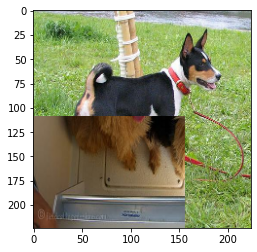

In [18]:
# mix two images
def mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    middle_left = image_a[y_min:y_max, 0:x_min, :] # image_bÏùò ÏôºÏ™Ω Î∞îÍπ• ÏòÅÏó≠
    middle_center = image_b[y_min:y_max, x_min:x_max, :]  # image_bÏùò ÏïàÏ™Ω ÏòÅÏó≠
    middle_right = image_a[y_min:y_max, x_max:image_size_x, :] # image_bÏùò Ïò§Î•∏Ï™Ω Î∞îÍπ• ÏòÅÏó≠
    middle = tf.concat([middle_left,middle_center,middle_right], axis=1)
    top = image_a[0:y_min, :, :]
    bottom = image_a[y_max:image_size_y, :, :]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img

mixed_img = mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max)
plt.imshow(mixed_img.numpy())
plt.show()

#### 3. ÎùºÎ≤® ÏÑûÍ∏∞  
- Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÏóàÎã§Î©¥  
  ÎùºÎ≤®ÎèÑ ÎßûÏ∂∞ÏÑú ÏÑûÏñ¥Ï§òÏïºÌï®  
  -> Ïù¥ÎØ∏ÏßÄ ÏÑûÏùÄ ÎπÑÏú®Ïóê ÎßûÏ∂∞ÏÑú ÎùºÎ≤®ÎèÑ ÏÑûÍ∏∞  
  -> CutMixÏóêÏÑúÎäî Î©¥Ï†ÅÏóê ÎπÑÎ°ÄÌï¥ÏÑú ÎùºÎ≤® ÏÑûÏùå  
  -> Ïù¥Îïå ÎùºÎ≤® Î≤°ÌÑ∞Îäî Î≥¥ÌÜµ ÌÅ¥ÎûòÏä§ ÌëúÏãúÎêòÎìØÏù¥  
  class 1Í∞úÏóê 1Ïùò Í∞í Í∞ÄÏ†∏ÏßÄÎäî Ïõê-Ìï´ Ïù∏ÏΩîÎî© Î∞©ÏãùÏù¥ ÏïÑÎãò  
  -> AÏôÄ B ÌÅ¥ÎûòÏä§Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Ïóê Í∞Å Í∞Å 0.4, 0.6 Í≥º Í∞ôÏùÄ Í∞íÏù¥  
  Î∞∞Î∂ÑÎêòÎäî Î∞©ÏãùÏù¥ ÏÇ¨Ïö©Îê®  
  
##### 1) Ïù¥ÎØ∏ÏßÄ ÏÑûÏù∏ ÎùºÎ≤® ÎßåÎì§ Îïå Ï†ÅÏ†àÌïú ÎπÑÏú®Î°ú ÎùºÎ≤® Ìï®Ï≥êÏ£ºÎäî Ìï®Ïàò ÏÉùÏÑ±  

In [19]:
# mix two labels
def mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max, num_classes=120):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    mixed_area = (x_max-x_min)*(y_max-y_min)
    total_area = image_size_x*image_size_y
    ratio = tf.cast(mixed_area/total_area, tf.float32)

    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_label = (1-ratio)*label_a + ratio*label_b
    return mixed_label

mixed_label = mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max)
mixed_label

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.35754144, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

##### 2) ÏµúÏ¢ÖÏ†ÅÏù∏ cutmix() Ìï®Ïàò ÏÉùÏÑ±  
- ÏúÑÏóêÏÑú Íµ¨ÌòÑÌïú  
  mix_2_images() : Ïù¥ÎØ∏ÏßÄ ÏÑûÍ∏∞  
  mix_2_label() : ÎùºÎ≤® ÏÑûÍ∏∞  
  Ìï®Ïàò ÌôúÏö©Ìï¥ÏÑú Î∞∞ÏπòÎã®ÏúÑ Ìï®Ïàò ÏÉùÏÑ±

In [20]:
def cutmix(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max))
        mixed_labels.append(mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max))

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels


-----
### 6. Mixup Augmentation  
- [mixup:Beyond Empirical Risk Minimization ÎÖºÎ¨∏](https://arxiv.org/abs/1710.09412)  
  

#### 1. Ìï®Ïàò ÏÉùÏÑ±
- Îëê Ïù¥ÎØ∏ÏßÄ ÏåçÏùÑ ÏÑûÏùÑ ÎπÑÏú®  
  -> ÏùºÏ†ïÌïú Î≤îÏúÑ ÎÇ¥ ÎûúÎç§ÌïòÍ≤å ÎΩëÏùå  
  -> ÎπÑÏú®Ïóê Îî∞Îùº Îëê Ïù¥ÎØ∏ÏßÄ ÌîΩÏÖÄÎ≥Ñ Í∞í, ÎùºÎ≤® ÏÑûÏñ¥Ï£ºÍ∏∞  
  
  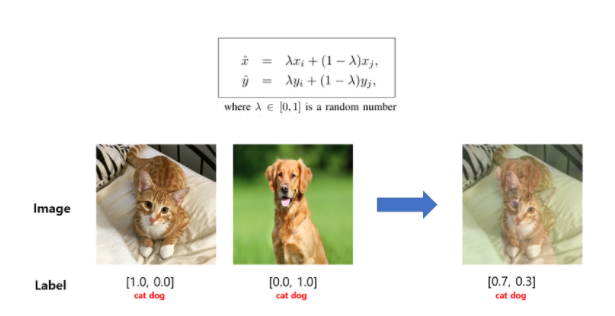  
  
##### 1) ÎûúÎç§Ìïú ÎπÑÏú®Î°ú Îëê Ïù¥ÎØ∏ÏßÄ mixup Ìï®Ïàò ÏÉùÏÑ±  

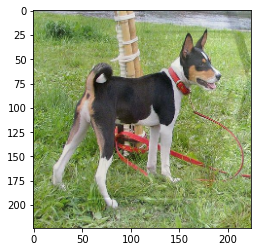

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.18113315
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [21]:
# function for mixup
def mixup_2_images(image_a, image_b, label_a, label_b):
    ratio = tf.random.uniform([], 0, 1)
    
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_image= (1-ratio)*image_a + ratio*image_b
    mixed_label = (1-ratio)*label_a + ratio*label_b
    
    return mixed_image, mixed_label

mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
plt.imshow(mixed_img.numpy())
plt.show()
print(mixed_label)

##### 2) Î∞∞Ïπò Îã®ÏúÑÏùò mixup() Ìï®Ïàò ÏÉùÏÑ±  

In [22]:
def mixup(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0,batch_size), tf.int32)
        image_b = image[j]
        label_b = label[j]
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

-----
### 5. Agumentation Ï†ÅÏö© ÏµúÏ¢Ö Î©îÏù∏ Ìï®Ïàò ÏÉùÏÑ±

 
- apply_normalize_on_dataset() :  
  ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Îã§ÏñëÌïú ÌòïÌÉúÏùò Í∞ÄÍ≥µÌïú ÌòïÌÉúÏùò  
  ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏñªÍ≤å ÎêòÎäî Î™®Îì† Í≥ºÏ†ïÏùÑ Íµ¨ÌòÑÌïú Î©îÏù∏ Ìï®Ïàò  
  
  -> ÏùºÎ∞òÏ†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï  
  (normalize, resize, augmentation, shuffle Ï†ÅÏö©)  
  
  -> Ï£ºÏùòÌï¥Ïïº Ìï† Ï†ê  
  shuffleÏù¥ÎÇò augmentationÏùÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Ï†ÅÏö© ÏïàÌï®  
  
  
- Ïó¨Îü¨Í≤∞Í≥º Ï°∞Ìï© ÏúÑÌïú ÏïôÏÉÅÎ∏î(ensemble) Î∞©Î≤ï Ï§ë ÌïòÎÇò  
  -> ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê augmentation Ï†ÅÏö©ÌïòÎäî test-time augmentation  
  (Ï∫êÍ∏Ä Îì± Í≤ΩÏüÅ Î®∏Ïã†Îü¨ÎãùÏóê ÎßéÏù¥ ÏÇ¨Ïö©, ÏßÄÍ∏àÏùÄ Í∞úÎÖêÎßå ÏïåÏïÑÎëêÏûê)  
  ([ test-time augmentation ÏÑ§Î™Ö Î∏îÎ°úÍ∑∏](https://hwiyong.tistory.com/215))  
  
  
- with_aug=False :  
  augmentationÏùò Ï†ÅÏö©Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌï† Ïàò ÏûàÎèÑÎ°ù Ìï®  
  (Ïù¥ÌõÑ ÎπÑÍµê Ïã§Ìóò ÏúÑÌï¥)  
  [tf.data.Datasets.map()](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)  

In [23]:
BATCH_SIZE = 20

In [24]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=BATCH_SIZE, with_aug=False, with_cutmix=False,with_mixup=False):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment
        )
    ds = ds.batch(batch_size)
    if not is_test and with_cutmix:
        ds = ds.map(
            cutmix,
            num_parallel_calls=2
        )
    elif not is_test and with_mixup:
        ds = ds.map(
            mixup,
            num_parallel_calls=2
        )
    else:
        ds = ds.map(
            onehot,
            num_parallel_calls=2
        )
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

### 7. Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±ÌïòÍ∏∞  
- Í∞ÅÍ∞ÅÏùò AugumentationÏù¥ Ï†ÅÏö©/ÎØ∏Ï†ÅÏö© Îêú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±

In [25]:
def onehot(image, label) :
    label = tf.one_hot(label, num_classes)
    return image, label

### 6. ÎπÑÍµê Ïã§ÌóòÌïòÍ∏∞  
- ÎπÑÍµêÌïòÎ†§Í≥† ÌïòÎäî Í≤É  
  1) Augumentation ÎØ∏Ï†ÅÏö©  
  2) Í∏∞Î≥∏ Augumentation Ï†ÅÏö©  
  3) Augumentation Cutmix Ï†ÅÏö©  
  4) Augumentation Cutmix + Í∏∞Î≥∏ Augumentation Ï†ÅÏö©  
  5) Augumentation Mixup Ï†ÅÏö©  
  6) Augumentation Mixup  + Í∏∞Î≥∏ Augumentation Ï†ÅÏö©  
  Îç∞Ïù¥ÌÑ∞Îì§ ÌïôÏäµÏãúÏºúÏÑú ÏÑ±Îä• ÎπÑÍµê  

#### 1. Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±  
- Ï¥ù 6Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏÖã Íµ¨ÏÑ±  

In [26]:
(ds_train,ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train','test'],
    as_supervised = True,
    shuffle_files = True,
    with_info = True,
)

ds_train_no_aug = apply_normalize_on_dataset(ds_train,with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train,with_aug=True)
ds_train_cutmix = apply_normalize_on_dataset(ds_train,batch_size=BATCH_SIZE,with_cutmix=True)
ds_train_cutmix_aug = apply_normalize_on_dataset(ds_train,batch_size=BATCH_SIZE,with_aug=True,with_cutmix=True)
ds_train_mixup = apply_normalize_on_dataset(ds_train,batch_size=BATCH_SIZE,with_mixup=True)
ds_train_mixup_aug = apply_normalize_on_dataset(ds_train,batch_size=BATCH_SIZE,with_aug=True,with_mixup=True)
ds_test = apply_normalize_on_dataset(ds_test,is_test=True)

#### 2. Î™®Îç∏ ÏÉùÏÑ±  
##### 1) Í∏∞Î≥∏:  ResNet50 Ï§ë imagenet ÏúºÎ°ú ÌõàÎ†®Îêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞  
- Augumentation ÎØ∏Ï†ÅÏö©  

In [27]:
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

##### 2) Í∏∞Î≥∏ Augumentation + ResNet50   
- Í∏∞Î≥∏ Augumentation Ï†ÅÏö©


In [28]:
aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

##### 3)  Cutmix + ResNet50  
- 3) Augumentation Cutmix Îßå Ï†ÅÏö©

In [29]:
cut_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

##### 4) Í∏∞Î≥∏ Augumentation +  Cutmix + ResNet50 
4) Augumentation Cutmix + Í∏∞Î≥∏ Augumentation Ï†ÅÏö©

In [30]:
cut_aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

##### 5) Mixup+ ResNet50 
- Augumentation Mixup Îßå Ï†ÅÏö©

In [31]:
mix_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

##### 6) Í∏∞Î≥∏ Augumentation + Mixup+ ResNet50 
- Augumentation Mixup + Í∏∞Î≥∏ Augumentation Ï†ÅÏö©

In [32]:
mix_aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

#### 3. Î™®Îç∏ ÌïôÏäµ  

In [33]:
# 1. ResNet 50 (Í∏∞Î≥∏)
resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

# 2. Í∏∞Î≥∏ Augumentation Ï†ÅÏö©
aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

# 3. cut Îßå Ï†ÅÏö©
cut_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

# 4. Í∏∞Î≥∏ aug + cut Ï†ÅÏö©
cut_aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

# 5. mix Îßå Ï†ÅÏö©
mix_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

# 6. Í∏∞Î≥∏ aug + mix Ï†ÅÏö©
mix_aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

In [34]:
#warning Î¨¥Ïãú ÏΩîÎìú  
#ÌÑ∞ÎØ∏ÎÑêÏóê export TF_CPP_MIN_LOG_LEVEL=2 Ïù¥ÌõÑ
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [35]:
EPOCH = 20

# 1. ResNet 50 (Í∏∞Î≥∏)------------------------------
history_resnet50_no_aug = resnet50.fit(
    ds_train_no_aug, # augmentation Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

#ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇòÎà†ÏÑú ÌïôÏäµÎèåÎ¶¨Í∏∞

Epoch 1/20
750/750 [==============================] - 461s 567ms/step - loss: 3.0487 - accuracy: 0.3084 - val_loss: 3.3703 - val_accuracy: 0.2106
Epoch 2/20
750/750 [==============================] - 357s 476ms/step - loss: 0.7145 - accuracy: 0.8025
Epoch 3/20
750/750 [==============================] - 358s 477ms/step - loss: 0.2155 - accuracy: 0.9564
Epoch 4/20
750/750 [==============================] - 358s 477ms/step - loss: 0.0768 - accuracy: 0.9932
Epoch 5/20
750/750 [==============================] - 358s 478ms/step - loss: 0.0323 - accuracy: 0.9983
Epoch 6/20
750/750 [==============================] - 357s 477ms/step - loss: 0.0173 - accuracy: 0.9991
Epoch 7/20
750/750 [==============================] - 357s 476ms/step - loss: 0.0162 - accuracy: 0.9994
Epoch 8/20
750/750 [==============================] - 358s 477ms/step - loss: 0.0135 - accuracy: 0.9994
Epoch 9/20
750/750 [==============================] - 359s 478ms/step - loss: 0.0110 - accuracy: 0.9995
Epoch 10/20
750/750 [=

In [36]:
# 2. Í∏∞Î≥∏ Augumentation Ï†ÅÏö©-------------------------
history_resnet50_aug = aug_resnet50.fit(
    ds_train_aug, # augmentation Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)


Epoch 1/20
750/750 [==============================] - 435s 567ms/step - loss: 3.1096 - accuracy: 0.3010 - val_loss: 2.8772 - val_accuracy: 0.2825
Epoch 2/20
750/750 [==============================] - 356s 475ms/step - loss: 0.9488 - accuracy: 0.7259
Epoch 3/20
750/750 [==============================] - 357s 476ms/step - loss: 0.4834 - accuracy: 0.8663
Epoch 4/20
750/750 [==============================] - 358s 477ms/step - loss: 0.2490 - accuracy: 0.9394
Epoch 5/20
750/750 [==============================] - 358s 477ms/step - loss: 0.1647 - accuracy: 0.9645
Epoch 6/20
750/750 [==============================] - 358s 477ms/step - loss: 0.0880 - accuracy: 0.9860
Epoch 7/20
750/750 [==============================] - 357s 476ms/step - loss: 0.0571 - accuracy: 0.9932
Epoch 8/20
750/750 [==============================] - 358s 477ms/step - loss: 0.0383 - accuracy: 0.9952
Epoch 9/20
750/750 [==============================] - 357s 476ms/step - loss: 0.0326 - accuracy: 0.9953
Epoch 10/20
750/750 [=

In [38]:
# 3. cut Îßå Ï†ÅÏö©---------------------------------
history_resnet50_cut = aug_resnet50.fit(
    ds_train_cutmix, # cut Îßå Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 403s 459ms/step - loss: 2.4367 - accuracy: 0.6238 - val_loss: 1.3952 - val_accuracy: 0.6324
Epoch 2/20
750/750 [==============================] - 278s 370ms/step - loss: 2.2413 - accuracy: 0.6779
Epoch 3/20
750/750 [==============================] - 277s 369ms/step - loss: 2.1125 - accuracy: 0.7069
Epoch 4/20
750/750 [==============================] - 277s 369ms/step - loss: 1.9977 - accuracy: 0.7408
Epoch 5/20
750/750 [==============================] - 277s 370ms/step - loss: 1.9781 - accuracy: 0.7479
Epoch 6/20
750/750 [==============================] - 278s 371ms/step - loss: 1.9288 - accuracy: 0.7517
Epoch 7/20
750/750 [==============================] - 277s 369ms/step - loss: 1.8479 - accuracy: 0.7719
Epoch 8/20
750/750 [==============================] - 277s 369ms/step - loss: 1.8312 - accuracy: 0.7769
Epoch 9/20
750/750 [==============================] - 277s 369ms/step - loss: 1.7804 - accuracy: 0.7878
Epoch 10/20
750/750 [=

In [39]:
# 4. Í∏∞Î≥∏ aug + cut Ï†ÅÏö©-------------------------
history_resnet50_cut_aug = aug_resnet50.fit(
    ds_train_cutmix_aug, # cut +augmentation Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)


Epoch 1/20
750/750 [==============================] - 351s 460ms/step - loss: 1.7593 - accuracy: 0.7601 - val_loss: 1.3569 - val_accuracy: 0.6717
Epoch 2/20
750/750 [==============================] - 276s 369ms/step - loss: 1.6983 - accuracy: 0.7838
Epoch 3/20
750/750 [==============================] - 277s 369ms/step - loss: 1.6944 - accuracy: 0.7769
Epoch 4/20
750/750 [==============================] - 277s 370ms/step - loss: 1.6625 - accuracy: 0.7833
Epoch 5/20
750/750 [==============================] - 277s 369ms/step - loss: 1.6442 - accuracy: 0.7875
Epoch 6/20
750/750 [==============================] - 277s 369ms/step - loss: 1.6064 - accuracy: 0.8052
Epoch 7/20
750/750 [==============================] - 277s 369ms/step - loss: 1.6032 - accuracy: 0.7964
Epoch 8/20
750/750 [==============================] - 277s 369ms/step - loss: 1.5748 - accuracy: 0.8067
Epoch 9/20
750/750 [==============================] - 277s 369ms/step - loss: 1.5700 - accuracy: 0.8065
Epoch 10/20
750/750 [=

In [40]:
# 5. mix Îßå Ï†ÅÏö©---------------------------------
history_resnet50_mix = aug_resnet50.fit(
    ds_train_mixup, # mixÎßå Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)


Epoch 1/20
750/750 [==============================] - 350s 460ms/step - loss: 1.8072 - accuracy: 0.8546 - val_loss: 1.6909 - val_accuracy: 0.6298
Epoch 2/20
750/750 [==============================] - 278s 370ms/step - loss: 1.7530 - accuracy: 0.8584
Epoch 3/20
750/750 [==============================] - 277s 369ms/step - loss: 1.7186 - accuracy: 0.8576
Epoch 4/20
750/750 [==============================] - 277s 369ms/step - loss: 1.6918 - accuracy: 0.8682
Epoch 5/20
750/750 [==============================] - 278s 371ms/step - loss: 1.6850 - accuracy: 0.8618
Epoch 6/20
750/750 [==============================] - 277s 369ms/step - loss: 1.6605 - accuracy: 0.8723
Epoch 7/20
750/750 [==============================] - 276s 369ms/step - loss: 1.6467 - accuracy: 0.8734
Epoch 8/20
750/750 [==============================] - 276s 369ms/step - loss: 1.6290 - accuracy: 0.8784
Epoch 9/20
750/750 [==============================] - 277s 369ms/step - loss: 1.6168 - accuracy: 0.8771
Epoch 10/20
750/750 [=

In [41]:
# 6. Í∏∞Î≥∏ aug + mix Ï†ÅÏö©-------------------------
history_resnet50_mix_aug = aug_resnet50.fit(
    ds_train_mixup_aug, # mix + augmentation Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)



Epoch 1/20
750/750 [==============================] - 353s 463ms/step - loss: 1.6477 - accuracy: 0.8553 - val_loss: 1.3446 - val_accuracy: 0.6904
Epoch 2/20
750/750 [==============================] - 277s 370ms/step - loss: 1.6302 - accuracy: 0.8618
Epoch 3/20
750/750 [==============================] - 276s 368ms/step - loss: 1.6135 - accuracy: 0.8572
Epoch 4/20
750/750 [==============================] - 276s 368ms/step - loss: 1.6141 - accuracy: 0.8597
Epoch 5/20
750/750 [==============================] - 276s 367ms/step - loss: 1.6006 - accuracy: 0.8668
Epoch 6/20
750/750 [==============================] - 276s 368ms/step - loss: 1.5907 - accuracy: 0.8659
Epoch 7/20
750/750 [==============================] - 276s 368ms/step - loss: 1.5763 - accuracy: 0.8714
Epoch 8/20
750/750 [==============================] - 276s 368ms/step - loss: 1.5557 - accuracy: 0.8749
Epoch 9/20
750/750 [==============================] - 276s 368ms/step - loss: 1.5510 - accuracy: 0.8737
Epoch 10/20
750/750 [=

- Î™®Îç∏ ÌõàÎ†®Ïãú   
  ÏúÑÏóêÏÑú ÎßåÎì† CutMixÎÇò MixupÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥  
  ÏïûÏóêÏÑú resnet50Í≥º aug_resnet50ÏùÑ ÌõàÎ†®ÌïòÎäî Îç∞  
  
1) categorical_crossentropy()  
  ```
  def onehot(image, label) :
    label = tf.one_hot(label, num_classes)
    return image, label
  ```
Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏúºÎ°ú image,label Î•º Î≥ÄÌôòÌï¥ÏÑú ÏÇ¨Ïö©  
- categorical_crossentropy() ÎûÄ?  
  - Multi-class classification Ï¶â ÌÅ¥ÎûòÏä§Í∞Ä Ïó¨Îü¨ Í∞úÏù∏ Îã§Ï§ë Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú ÏÇ¨Ïö©  
  - labelÏù¥ Ïõê-Ìï´ Ïù∏ÏΩîÎî© Îêú ÌòïÌÉú Ï¶â labelÏù¥ classÎ•º ÎÇòÌÉÄÎÇ¥Îäî one-hot vectorÎ•º Í∞íÏúºÎ°ú Í∞ÄÏßà Îïå ÏÇ¨Ïö©  
  - ÏòàÎ•º Îì§Ïñ¥, 3-class classification Î¨∏Ï†úÏóêÏÑú  
    labelÏù¥ [1, 0, 0] ÎòêÎäî [0, 1, 0] ÎòêÎäî [0, 0, 1]ÏùÑ Í∞íÏúºÎ°ú Í∞ÄÏßà Îïå ÏÇ¨Ïö©  
  - Î™®Îç∏Ïùò ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥Ïùò ÌôúÏÑ±Ìôî Ìï®ÏàòÎäî ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®Ïàò    
  
  
  2) sparse_categorical_crossentropy()ÏùÄ  
    Ï†Ä ÏõêÌï´ Ïù∏ÏΩîÎî©ÏùÑ ÏïàÌï¥Ï£ºÎ©¥ ÏÇ¨Ïö© Í∞ÄÎä•  
  
  - sparse_categorical_crossentropy Ïù¥ÎûÄ? 
    - categorical_crossentropyÏôÄ ÎèôÏùºÌïú Îã§Ï§ë Î∂ÑÎ•ò ÏÜêÏã§Ìï®Ïàò  
    - integer type ÌÅ¥ÎûòÏä§ÎùºÎäî Í≤ÉÏù¥ Îã§Î¶Ñ  
    - Ï∂úÎ†• Ïã§Ï∏°Í∞íÏù¥ [0, 1, 2] ÏôÄ Í∞ôÏùÄ ÌòïÌÉúÎ°ú one-hot encoding Í≥ºÏ†ïÏùÑ ÌïòÏßÄ ÏïäÏïÑÎèÑ Îê®  
    - Ïã§Ï∏° Ï∂úÎ†•Í∞íÏùÑ ÏûÖÎ†•ÌïòÎäî Î∂ÄÎ∂ÑÏóêÏÑú Î≥ÑÎèÑÎ°ú one-hot encodingÏùÑ Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÏù¥ Ï†ïÏàòÍ∞í Í∑∏ÎåÄÎ°ú Ï£ºÍ≥†,  
      ÏÜêÏã§Ìï®ÏàòÎ•º  sparse_categorical_crossentropy Î°ú Î∞îÍøîÏ£ºÍ∏∞Îßå ÌïòÎ©¥ Îê®  
      
[categorical_crossentropy, sparse_categorical_crossentropy() ÏÑ§Î™Ö Î∏îÎ°úÍ∑∏](https://crazyj.tistory.com/153)   

#### 4. ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî  

- accuracy

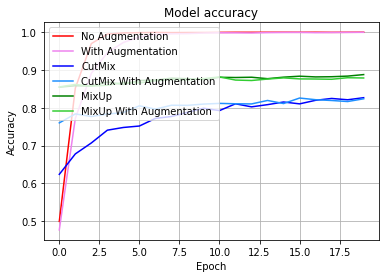

In [66]:
plt.plot(history_resnet50_no_aug.history['accuracy'], 'r')
plt.plot(history_resnet50_aug.history['accuracy'], 'violet')
plt.plot(history_resnet50_cut.history['accuracy'], 'b')
plt.plot(history_resnet50_cut_aug.history['accuracy'], 'dodgerblue')
plt.plot(history_resnet50_mix.history['accuracy'], 'g')
plt.plot(history_resnet50_mix_aug.history['accuracy'], 'limegreen')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['No Augmentation', 'With Augmentation','CutMix',
           'CutMix With Augmentation','MixUp','MixUp With Augmentation'],loc='upper left')
plt.show()

- loss

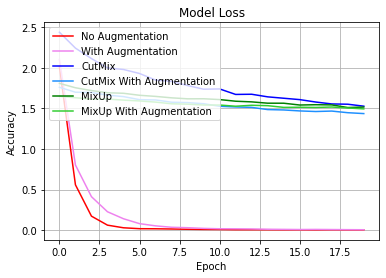

In [65]:
plt.plot(history_resnet50_no_aug.history['loss'], 'r')
plt.plot(history_resnet50_aug.history['loss'], 'violet')
plt.plot(history_resnet50_cut.history['loss'], 'b')
plt.plot(history_resnet50_cut_aug.history['loss'], 'dodgerblue')
plt.plot(history_resnet50_mix.history['loss'], 'g')
plt.plot(history_resnet50_mix_aug.history['loss'], 'limegreen')

plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation','CutMix',
           'CutMix With Augmentation','MixUp','MixUp With Augmentation'], loc='upper left')
plt.grid(True)
#plt.ylim(0.50, 0.80)    # Ï∂úÎ†•ÌïòÍ≥†Ïûê ÌïòÎäî  Accuracy Î≤îÏúÑÎ•º ÏßÄÏ†ïÌï¥ Ï£ºÏÑ∏Ïöî. 
#plt.ylim(0.72, 0.76)  # EPOCH=20ÏúºÎ°ú ÏßÑÌñâÌïúÎã§Î©¥ Ïù¥ Î≤îÏúÑÍ∞Ä Ï†ÅÎãπÌï©ÎãàÎã§. 
plt.show()

- val Ïóê ÎåÄÌïú ÏãúÍ∞ÅÌôîÍ∞Ä ÏßÑÌñâÎêòÏßÄ Î™ªÌï¥ÏÑú, ÏïÑÏâ¨Ïö¥ ÏãúÍ∞ÅÌôîÏßÄÎßå  
  ÎßéÏùÄ augmentation Í∏∞Î≤ïÏùÑ Ï†ÅÏö©ÌïòÏßÄ ÏïäÍ±∞ÎÇò Í∞ÄÎ≥çÍ≤å Ï†ÅÏö©Ìïú Î™®Îç∏Ïù¥  
  ÌïôÏäµ Í≤∞Í≥ºÍ∞Ä Îçî Ï¢ãÏïÑÎ≥¥Ïù∏Îã§  


- ÎßéÏùÄ augÍ∏∞Î≤ï Ï†ÅÏö©Ìïú Î™®Îç∏Ïù¥  
  Îçî Îã§ÏñëÌïú Î¨∏Ï†úÎ•º ÌïôÏäµÏãúÏº∞Í∏∞ ÎïåÎ¨∏Ïóê ÌïôÏäµÌï¥ÏïºÌï† ÏÉÅÌô©Îì§Ïù¥ Îçî ÎßéÏïÑÏ†∏ÏÑú  
  augÎ•º Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Î™®Îç∏Î≥¥Îã§ Îçî ÏïàÏ¢ãÏùÄ accuracy, lossÎ•º Í∞ñÎäîÍ≤ÉÏù∏ÏßÄ  
  ÏõêÏù∏Ïù¥ Î∂ÑÎ™ÖÌïòÍ≤å ÎèÑÏ∂úÎêòÏßÄ Î™ªÌñàÎã§  
  
  
- ÎèôÎ£åÎì§Ïùò val ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎ•º Î≥∏Îã§Î©¥  
  augÎ•º ÎØ∏Ï†ÅÏö©ÌïòÍ±∞ÎÇò Í∞ÄÎ≥çÍ≤å Ï†ÅÏö©ÌñàÏùÑ ÎïåÎäî ÏùºÏ†ï ÏàòÏ§ÄÏù¥ ÎêòÎ©¥ lossÍ∞Ä ÎÇÆÏïÑÏßÄÏßÄ ÏïäÎäî Í≤É Í∞ôÎã§  
  Îçî Ïò§Îûò ÌïôÏäµÏùÑ ÏãúÏº∞ÏùÑÎïå ÎØ∏Ï†ÅÏö©, Í∏∞Î≥∏ Ï†ÅÏö©ÏùÄ ÏùºÏ†ï ÏàòÏ§Ä lossÍ∞í Ïù¥ÌõÑÏóî Ïò§Î≤ÑÌîºÌåÖÏù¥ ÎêòÏßÄÎßå,  
  augÎ•º Ï†ÅÏö©Ìïú Î™®Îç∏Îì§ÏùÄ ÎØ∏Ï†ÅÏö©,Í∏∞Î≥∏Ï†ÅÏö©ÏùÑ Ìïú Î™®Îç∏Îì§Ïóê ÎπÑÌï¥  
  Îçî ÎÇÆÏùÄ lossÍ∞í ÎèÑÏ∂úÍ≥º Ïò§Î≤ÑÌîºÌåÖÏù¥ Î∞©ÏßÄÎêòÏßÄ ÏïäÏùÑÍπå? ÎùºÎäî Ï°∞Ïã¨Ïä§Îü∞ Ï∂îÎ°†ÏùÑ Ìï¥Î≥∏Îã§  
  
  
  
 

-----
## ÌöåÍ≥†  

### üíöÎ£®Î∏åÎ¶≠ ÌèâÍ∞Ä  
1. CutMixÏôÄ MixUp Í∏∞Î≤ïÏùÑ ResNet50 Î∂ÑÎ•òÍ∏∞Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÅÏö©ÌïòÏòÄÎäîÍ∞Ä?  
CutMixÏôÄ MixUpÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌõàÎ†®Ìïú Í∞ÅÍ∞ÅÏùò ResNet Î™®Îç∏Ïù¥ ÏàòÎ†¥Ìï®  


2. Îã§ÏñëÌïú Ïã§ÌóòÏùÑ ÌÜµÌï¥ ÌÉúÏä§ÌÅ¨Ïóê ÏµúÏ†ÅÏù∏ Augmentation Í∏∞Î≤ïÏùÑ Ï∞æÏïÑÎÇ¥ÏóàÎäîÍ∞Ä?  
Augmentation Ï†ÅÏö©ÏùÑ ÌÜµÌï¥ Augmentaion ÎØ∏Ï†ÅÏö©Ïãú ÎåÄÎπÑ 5% Ïù¥ÏÉÅÏùò ÏÑ±Îä•Ìñ•ÏÉÅÏùÑ ÌôïÏù∏Ìï®  


3. Ïó¨Îü¨Í∞ÄÏßÄ Augmentation Í∏∞Î≤ïÏùÑ Ï†ÅÏö©Ìïú Í≤∞Í≥ºÎ•º Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÎπÑÍµêÎ∂ÑÏÑùÌïòÏòÄÎäîÍ∞Ä?  
Í∏∞Î≥∏ Augmentation, CutMix, MixUpÏù¥ Ï†ÅÏö©Îêú Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÏôÄ Ìï®Íªò Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌï®    


### üíö Í∞úÏÑ†Ï†ê & ÏùòÎ¨∏Ï†ê  
##### 1) aug, cutmix Î™®Îëê Î∞òÏòÅ  
cutmixÌï®ÏàòÏóê Í∏∞Ï°¥ aug Ìï®Ïàò ÎÇ¥Ïö© ÎÑ£ÏóàÎäîÎç∞  
Ïò§Î•òÏóÜÏù¥ ÏûëÎèôÎêòÏóàÏßÄÎßå  
Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä augÎ∞òÏòÅ ÎêúÍ±¥ÏßÄ ÌôïÏã†Ïù¥ ÏïàÎì†Îã§  
ÌçºÏã§ÎãòÍªò ÌîºÎìúÎ∞± Î∞õÍ∏∞Î°ú ...!
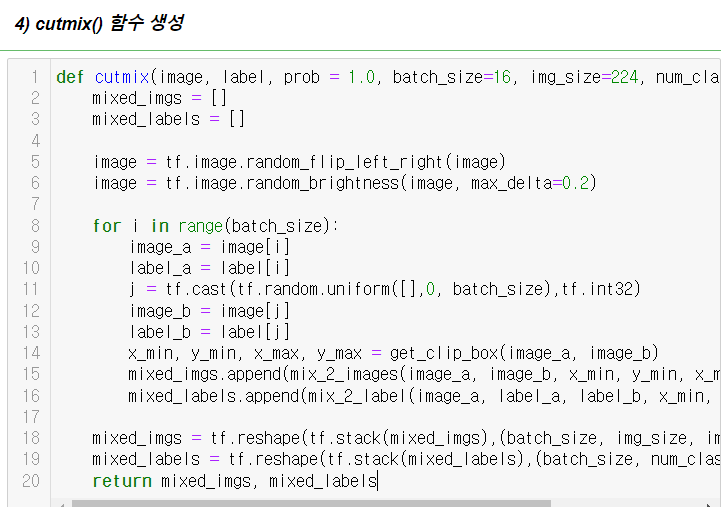  

##### 2) Îç∞Ïù¥ÌÑ∞ Ï†ÅÏö© ÏµúÏ¢Ö Ìï®Ïàò Í∞ÅÍ∞Å ÏÉùÏÑ±  
Ï≤òÏùåÏóî Í∏∞Îä•ÎßàÎã§ Ìï®Ïàò ÏÉùÏÑ±ÌïòÎ†§Í≥† ÌñàÎçîÎãà ÏóêÎü¨Í∞Ä ÎÇ¨Îã§  
ÏôúÍ∑∏Îü∞ÏßÄ Ïù¥Ïú†Î•º ÌòºÏûê Î∞ùÌòÄÎÇ¥ÏßÄ Î™ªÌñàÎã§  
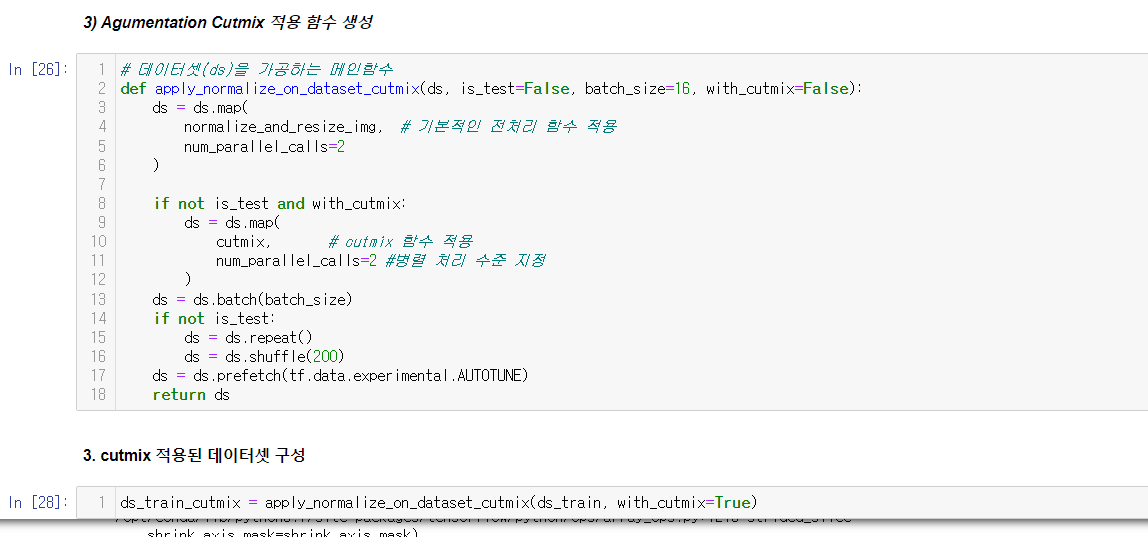  

##### 3) val_accuracy 
ÌïôÏäµÏãú val_accuracy Í∞Ä ÎÇòÏò§ÏßÄ ÏïäÎäîÎã§  
Îã§Î•∏ ÎèôÎ£åÎì§Í≥º ÎèôÏùºÌïòÍ≤å ÏßÑÌñâ ÌùêÎ¶ÑÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞ÎèÑ Î∂àÍµ¨ÌïòÍ≥† 1 epochÎßå ÏßÑÌñâÎêúÎã§  
1 epochÏóêÏÑú ÏßÑÌñâÎêòÎäîÍ≤ÉÏùÑ Î≥¥Î©¥, test Îç∞Ïù¥ÌÑ∞ ÏÖãÎèÑ Ïûò Î∂ÑÎ¶¨Îêú Í≤É Í∞ôÏùÄÎç∞  
1 epoch Ïù¥ÌõÑÏóêÎäî test(val)Ïù¥ ÏßÑÌñâÎêòÍ≥† ÏûàÏßÄ ÏïäÏùÄÍ≤ÉÏù∏Í∞Ä ÏùòÎ¨∏Ïù¥ Îì†Îã§  
ÎØ∏Ìï¥Í≤∞ Í≥ºÏ†úÏù¥Í≥†, Î≥µÏäµ ÏãúÏóê Ìï¥Í≤∞Ìï¥Î¥êÏïºÌï† Î∂ÄÎ∂Ñ  


### üíö Ï∞∏Í≥† ÏûêÎ£å
1. [categorical_crossentropy, sparse_categorical_crossentropy() ÏÑ§Î™Ö Î∏îÎ°úÍ∑∏](https://crazyj.tistory.com/153)   
2. [ test-time augmentation ÏÑ§Î™Ö Î∏îÎ°úÍ∑∏](https://hwiyong.tistory.com/215)  
3. [tf.data.Datasets.map()](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)  